# First-Order: Divided bar

**Evaluate Bending Moments of a Load-Divided and User-Divided Bar**

In this example, we analyze a **simply supported beam** using first-order structural analysis.
A vertical point load is applied at the midspan of the beam, and the resulting internal forces are evaluated.

The focus of this example is to demonstrate how the software handles:

* Automatic bar subdivision caused by loads acting inside a bar
* User-defined bar subdivision for result evaluation at specific locations
* Extraction of internal forces
* **Plotting the bending moment** distribution

This example provides a practical introduction to the modeling and meshing workflow in *sStatics*.
You can find the example as an executable Python file [here](https://github.com/i4s-htwk/sStatics/blob/main/sstatics/examples/02_firstorder/05_divided_bar.py).


## System Description

* **Beam length:** 3 m
* **Material:** Timber C24, (E = 11000000 $\frac{kN}{m^2}$)
* **Cross-section:** width / height = 10 cm / 20 cm
* **Support:**
    *  Start node: fixed in 'u' and 'w'
    *  End node: fixed in 'w'
* **Load:** 1 kN vertical point load at midspan

> ⚠️ **Note:** All values are converted into **meters (m)** and **kilonewtons (kN)** for consistent units.

## Define the Structural System

In this section, the static system is modeled.
For a detailed step-by-step workflow, refer to the *["Getting Started"](../../getting_started.rst)*  example.

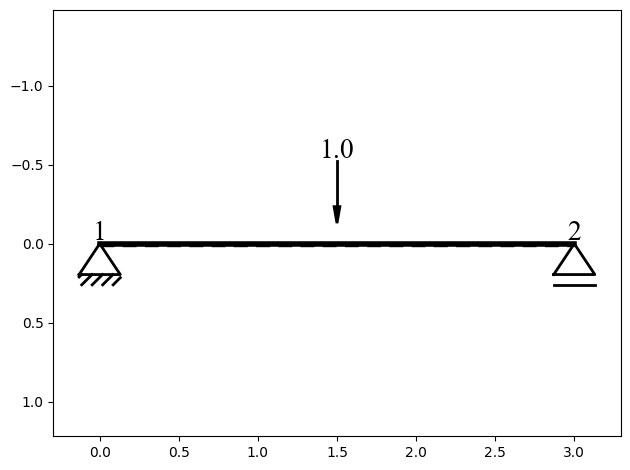

In [1]:
# 1. Import required modules
from sstatics.core.preprocessing import (
    Bar, BarPointLoad, CrossSection, Polygon, Material, Node, System
)
from sstatics.core.calc_methods import FirstOrder
from sstatics.core.postprocessing.graphic_objects import ObjectRenderer, SystemGeo

# 2. Define the cross-section using polygon geometry
cross_sec = CrossSection(
    geometry=[Polygon([(0, 0), (0.1, 0), (0.1, 0.2), (0, 0.2), (0, 0)])]
)

# 3. Define material (E = 11,000,000 kN/m²)
material = Material(11000000, 0.1, 0.1, 0.1)

# 4. Define nodes
n1 = Node(0, 0, u='fixed', w='fixed')  
n2 = Node(3, 0, w='fixed') 

# 5. Define the bar connecting the two nodes
bar_1 = Bar(n1, n2, cross_sec, material, point_loads=BarPointLoad(z=1, position=0.5))

# 6. Build the structural system
system = System([bar_1])

# Show system graphic
ObjectRenderer(SystemGeo(system), 'mpl').show()

## Create the Mesh

The final modeling step is the creation of the **computational mesh**.
The mesh consists of a list of bar elements that are used in the subsequent analysis.

Mesh generation is performed internally by the `System` class and is independent of the selected analysis method.

The key difference between modeled bars and mesh bars is that the mesh accounts for all required subdivisions.

There are two reasons why a bar may be subdivided:

##### 1. Automatic subdivision due to loads

If a `BarPointLoad` acts inside a bar (i.e., not at the start or end node), the bar is automatically subdivided at the load position.

This subdivision is required because the analysis algorithm evaluates results only at nodes.
Without a node at the load location, the load could not be correctly included.

Example:
A single bar with a point load at midspan is automatically divided into two mesh bars.

This process always occurs automatically and requires no user input.

##### 2. User-defined subdivision

In addition, users may specify custom subdivision points along a bar.
This is useful when results are required at specific locations, such as quarter points or other positions of interest.

These subdivisions are considered during mesh generation and may result in a mesh that differs from the original modeled bar list.

In this example, we compare two different mesh configurations:

* `system`: Automatically subdivided due to the midspan point load
* `system_user_division`: Automatically subdivided and additionally subdivided by the user

> ⚠️ **Note:**
> Automatic load-based subdivision is always applied, even when user-defined subdivisions are specified.

In [2]:
# Create a system with user-defined subdivisions
system_user_division = System([bar_1])

# Add user-defined subdivision points
system_user_division.create_mesh({bar_1: [0.25, 0.75]})

## Perform the Structural Analysis

Next, we perform a **first-order analysis** for both systems:

* the load-divided system
* the load- and user-divided system

In [3]:
# 7. Perform first-order structural analysis
solution = FirstOrder(system)
solution_user_division = FirstOrder(system_user_division)

## Get the Internal Forces

Internal forces are accessed using the `internal_forces` property.
They are stored as a **list of 6×1 vectors**, with one vector per mesh bar.

In [4]:
# 8. Extract internal forces
forces = solution.internal_forces
forces_user_division = solution_user_division.internal_forces

print("Internal forces of the load-divided bars:\n", forces)
print("Internal forces of the user-divided bars:\n", forces_user_division)

Internal forces of the load-divided bars:
 [array([[ 0.  ],
       [-0.5 ],
       [ 0.  ],
       [ 0.  ],
       [ 0.5 ],
       [ 0.75]]), array([[ 0.  ],
       [ 0.5 ],
       [-0.75],
       [ 0.  ],
       [-0.5 ],
       [ 0.  ]])]
Internal forces of the user-divided bars:
 [array([[ 0.0000000e+00],
       [-5.0000000e-01],
       [-4.4408921e-16],
       [ 0.0000000e+00],
       [ 5.0000000e-01],
       [ 3.7500000e-01]]), array([[ 0.   ],
       [-0.5  ],
       [-0.375],
       [ 0.   ],
       [ 0.5  ],
       [ 0.75 ]]), array([[ 0.   ],
       [ 0.5  ],
       [-0.75 ],
       [ 0.   ],
       [-0.5  ],
       [ 0.375]]), array([[ 0.   ],
       [ 0.5  ],
       [-0.375],
       [ 0.   ],
       [-0.5  ],
       [ 0.   ]])]


## Plot the Bending Moment Distribution

The bending moment distribution can be visualized directly using the `plot` method of the `FirstOrder` class.
To display bending moments, set `kind='moment'`.

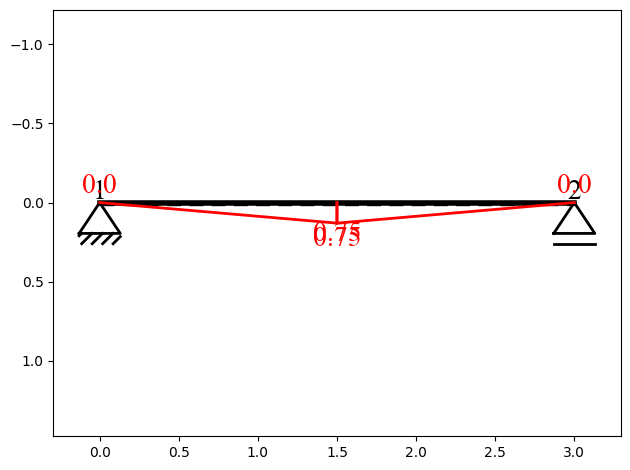

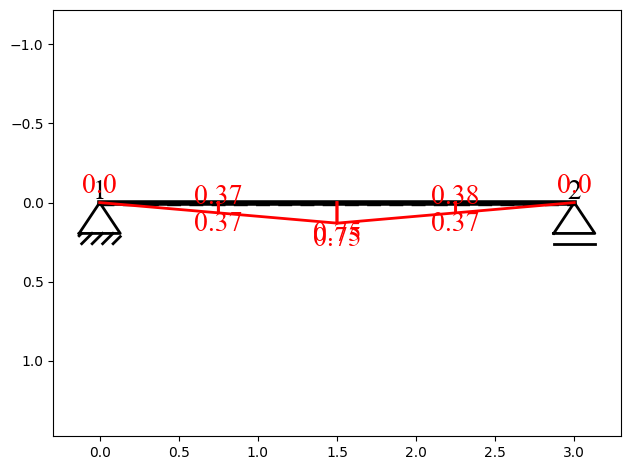

In [5]:
# 11. Plot bending moment distribution
solution.plot(kind='moment')
solution_user_division.plot(kind='moment')

The resulting plots illustrate how the bending moment distribution is represented for:

* the automatically subdivided mesh, and
* the mesh with additional user-defined subdivisions.

This demonstrates how subdivision affects **result resolution**, while the **physical behavior of the structure remains unchanged**.